# 1. **Importing Libraries**

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


---

# 2. **Loading and Inspecting the Data**

In [2]:
#read csv data
data = pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#saving a copy of the original dataset 
Original_Data = data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
data.shape

(614, 13)


### **Data Summary**

- The dataset contains **13 columns** and **614 rows**.

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Separate numerical and categorical columns

num_cols = data.select_dtypes(include=['number']).columns.tolist()  # Numerical columns
cat_cols = data.select_dtypes(exclude=['number']).columns.tolist()  # Categorical columns

print("Numerical Columns:")
print(num_cols)

print("\nCategorical Columns:")
print(cat_cols)

Numerical Columns:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Categorical Columns:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


---

# 3. **Handling Missing Values**

**Checking for Missing Values**

- We check for missing values in the training dataset using `.isnull().sum()` to see how many missing values exist in each column.


In [9]:
# missing values in each column
nan_counts = data.isna().sum()
nan_counts

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Missing Value Imputation Summary**

We handle **missing values** in the dataset by filling them with appropriate values:  

- For **numerical columns**, we fill the missing values with the **median** of each column. This ensures that the central tendency of the data remains unchanged.

- For **categorical columns**, we fill the missing values with the **mode** (most frequent value) of each column.



In [10]:
# Replacing NaN values with 
# MODE for cat cols and 
# MEDIAN for num cols

# List of categorical and numerical columns

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Replace NaN values in categorical columns with the mode
for col in cat_cols:
    mode_value = data[col].mode()[0]  # Mode returns a Series, we take the first value
    data[col].fillna(mode_value, inplace=True)

# Replace NaN values in numerical columns with the median
for col in num_cols:
    median_value = data[col].median()  # Median value for numerical columns
    data[col].fillna(median_value, inplace=True)

missing_values = data.isnull().sum().sort_values(ascending=False)
missing_columns = missing_values[missing_values > 0]
missing_columns


C:\Users\User\AppData\Local\Temp\ipykernel_21100\2945032234.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_21100\2945032234.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Series([], dtype: int64)

---

# 4. **Exploratory Data Analysis**

## Barplots and Scatterplots

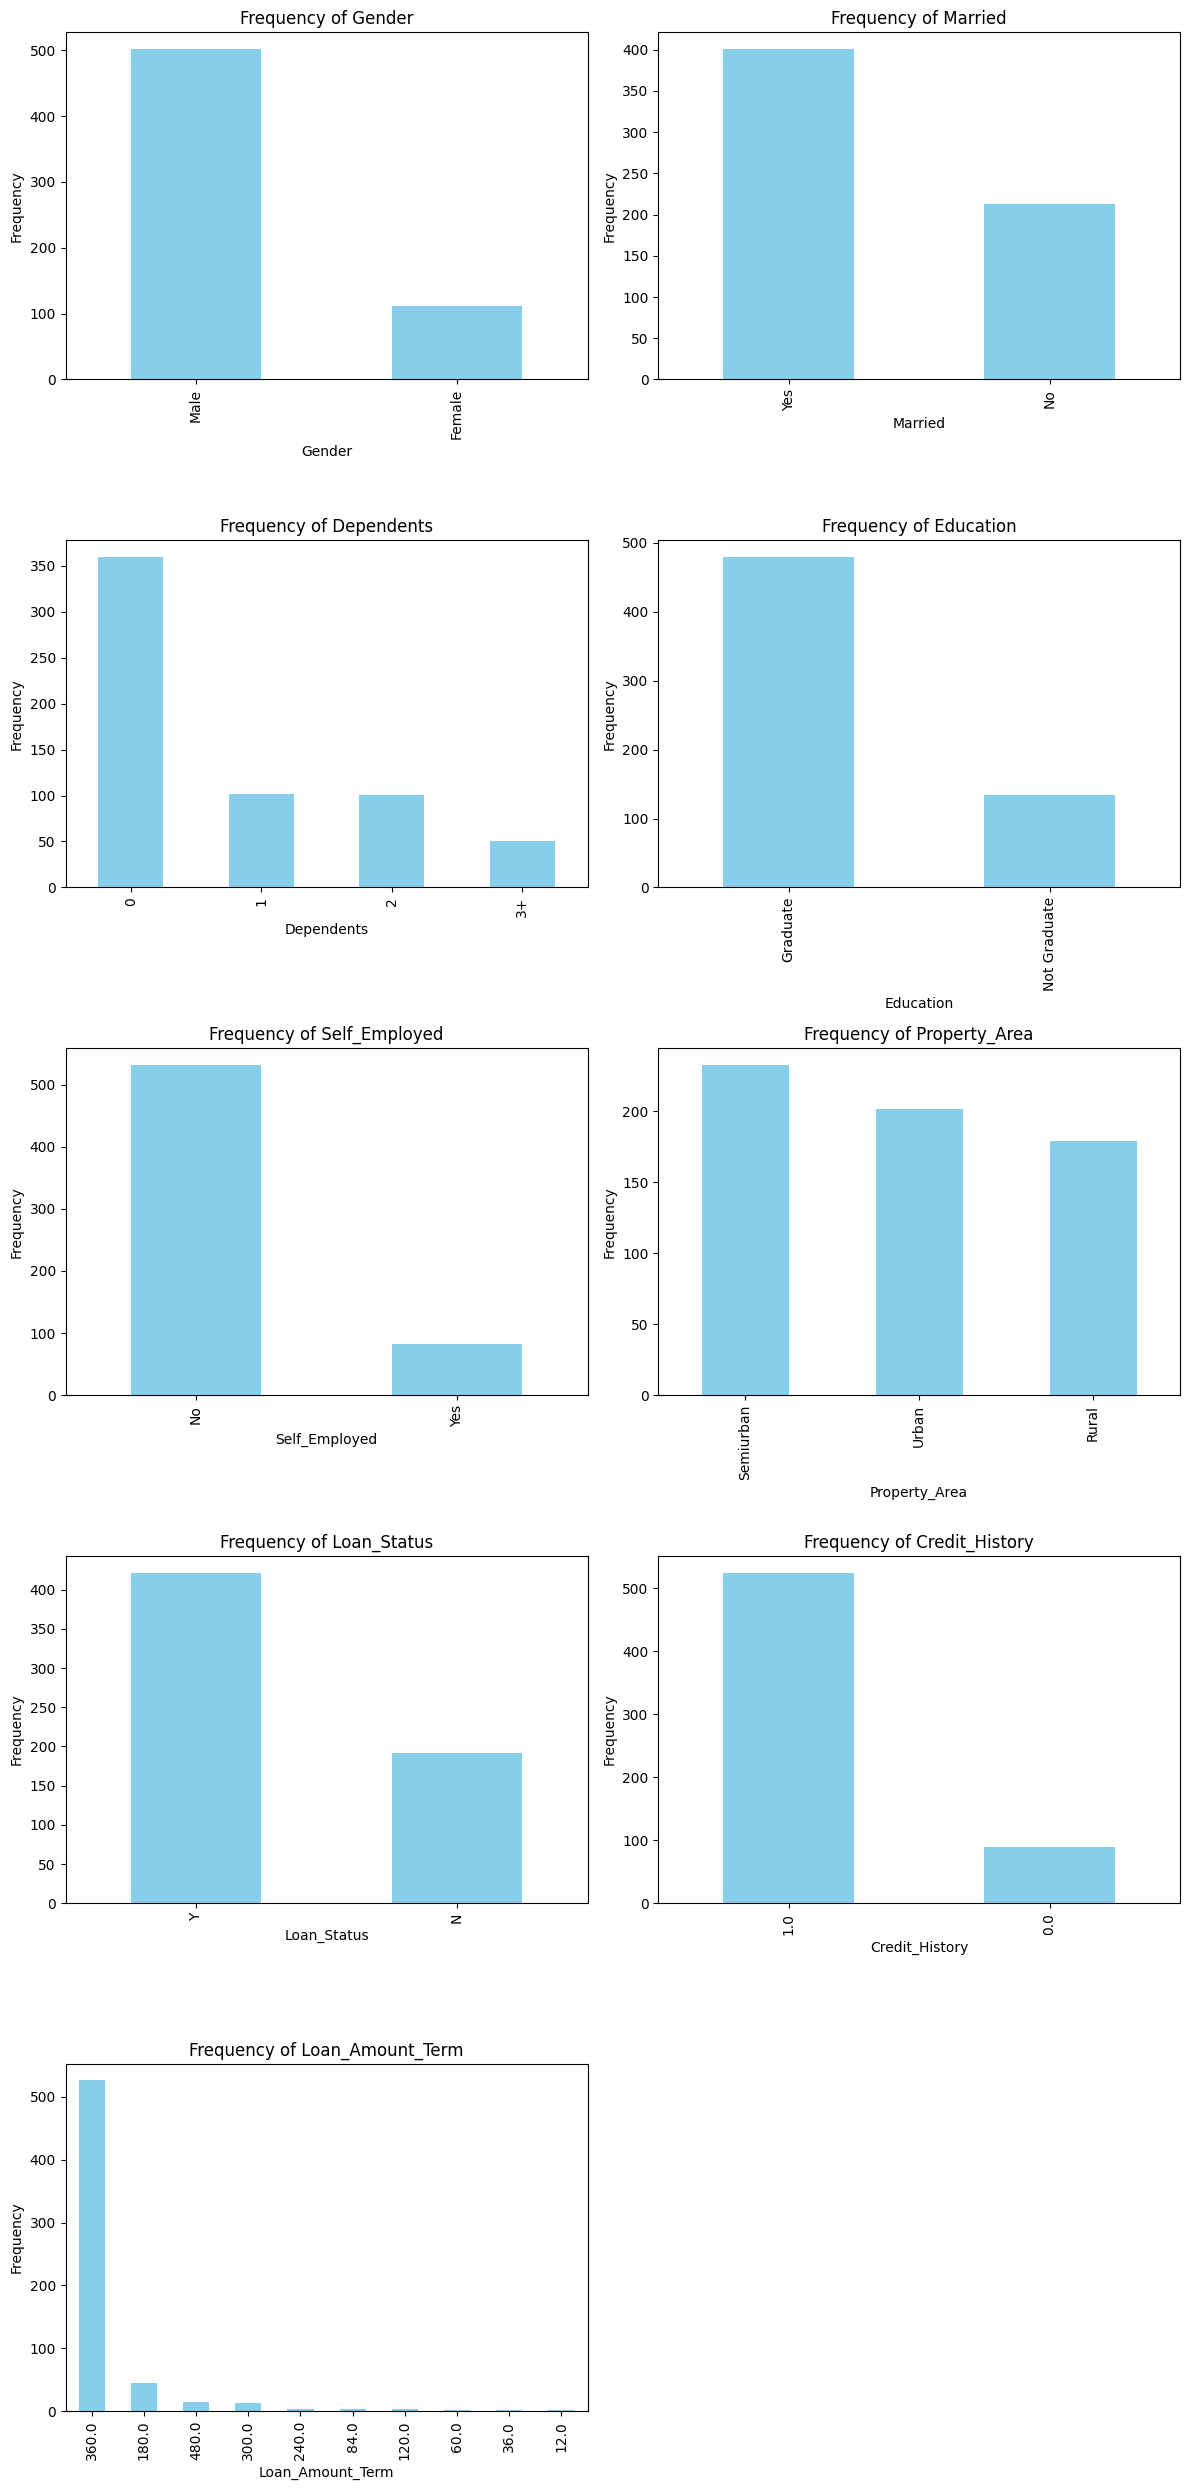

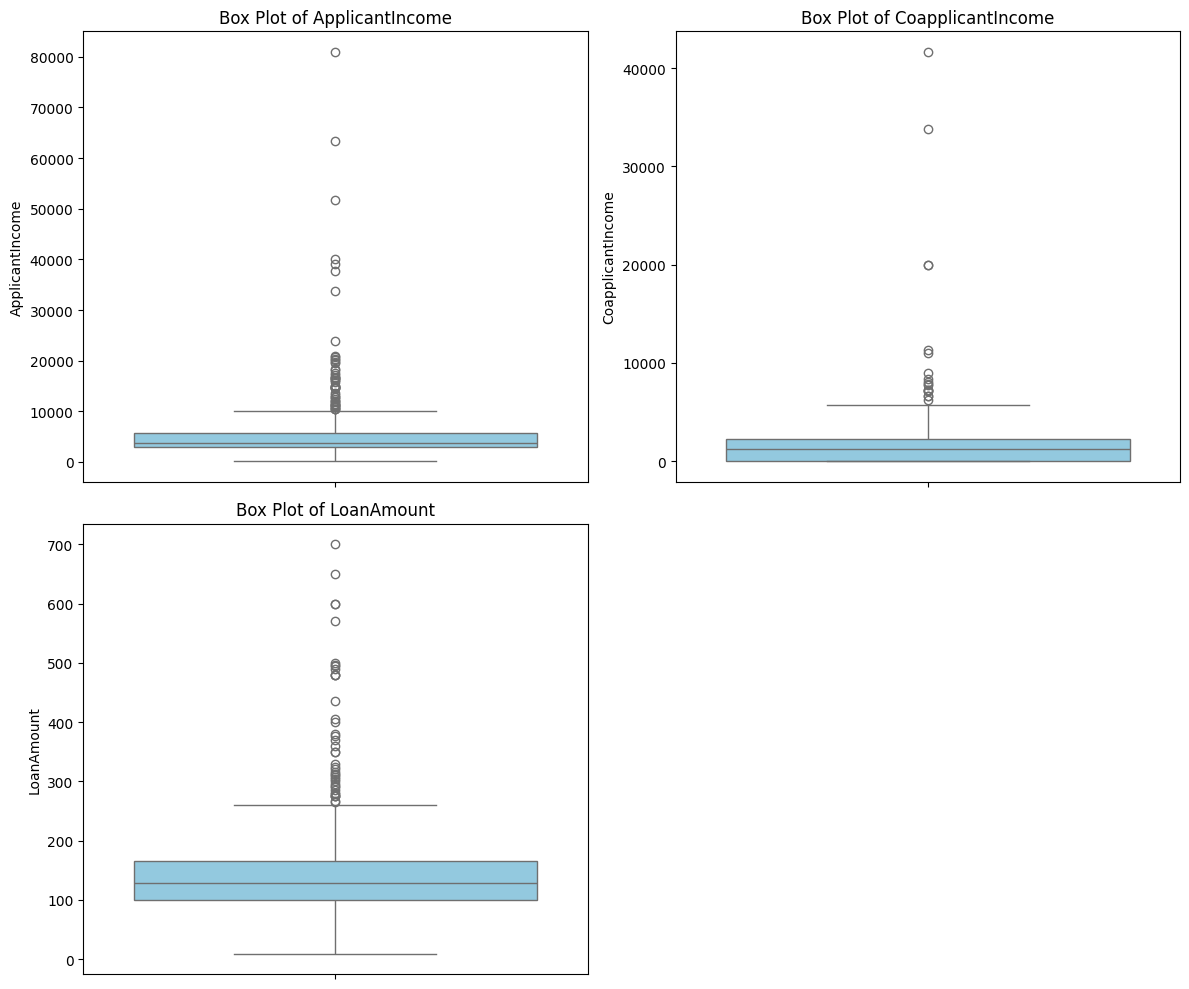

In [11]:
# plotting to see the trends 

# Define columns
barplot_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History', 'Loan_Amount_Term']
boxplot_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Bar Plot: Categorical column frequencies
num_cols = len(barplot_cols)
rows = math.ceil(num_cols / 2)  # Calculate rows for 2 columns per row

plt.figure(figsize=(12, rows * 5))  # Create a single figure for bar plots
for i, col in enumerate(barplot_cols, 1):
    plt.subplot(rows, 2, i)  # Create a grid layout
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Box Plot: Continuous columns
plt.figure(figsize=(12, 10))  # Create a single figure for box plots
for i, col in enumerate(boxplot_cols, 1):
    plt.subplot(2, 2, i)  # Create a grid layout (2 rows, 2 columns)
    sns.boxplot(y=data[col], color='skyblue')  # Box-and-whisker plot
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


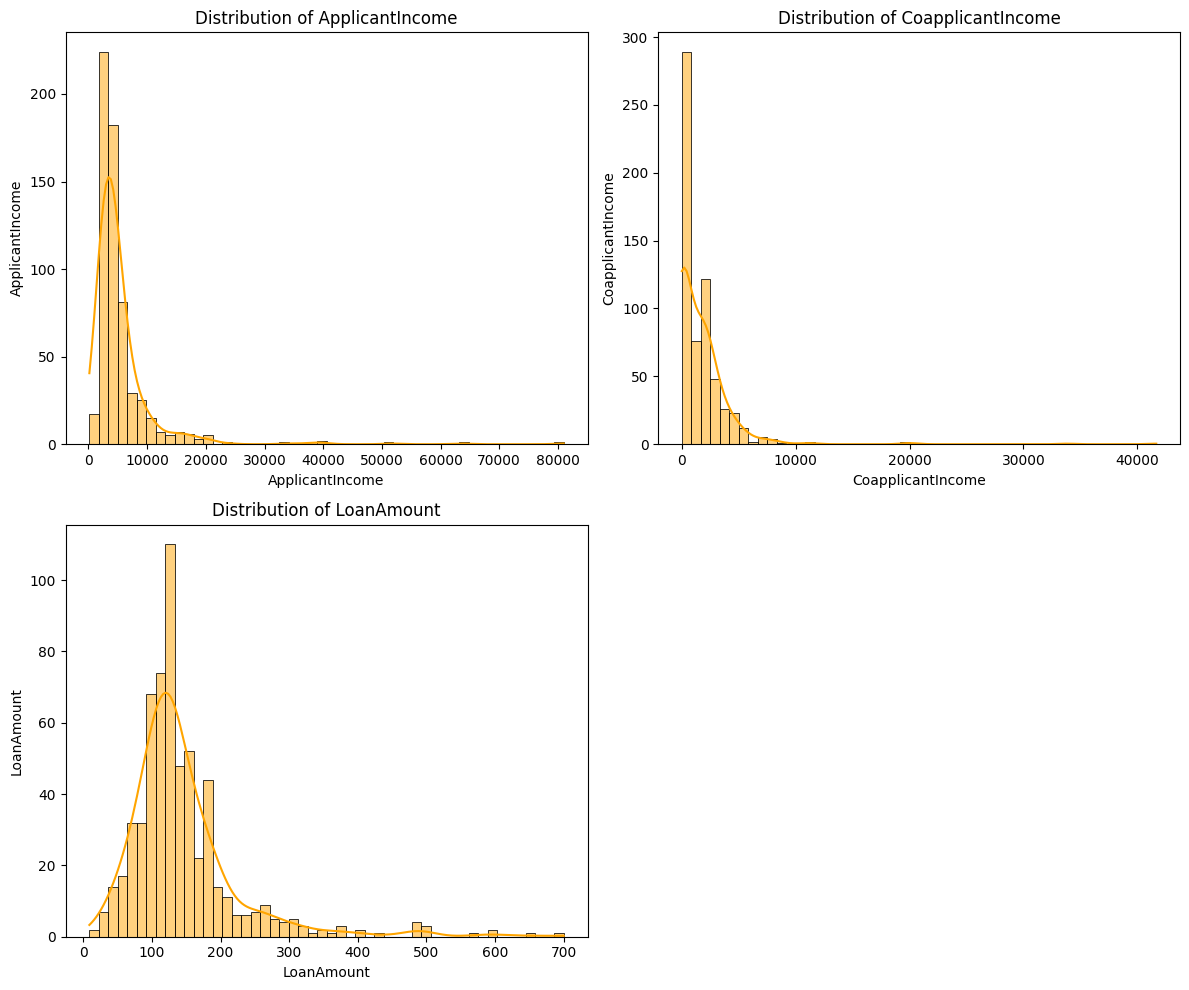

In [12]:
#plotting histograms to see how the data is distributed

plt.figure(figsize=(12, 10))  # Create a single figure for box plots

for i, col in enumerate(boxplot_cols, 1):
    plt.subplot(2, 2, i)  # Create a grid layout (2 rows, 2 columns)
    sns.histplot(data[col],
             kde=True,
             color='orange',
             bins=50)
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

---

# 5. **Handling Outliers**

- calculating number of outliers in each Numerical column

In [13]:
# calculate number of outliers in each column

# Function to calculate the number of outliers using IQR
def count_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower outlier threshold
    upper_bound = Q3 + 1.5 * IQR  # Upper outlier threshold
    
    # Count outliers below the lower bound or above the upper bound
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

applicant_income_outliers = count_outliers(data['ApplicantIncome'])
Coapplicant_income_outliers = count_outliers(data['CoapplicantIncome'])
loan_amount_outliers = count_outliers(data['LoanAmount'])

In [14]:
print(f"ApplicantIncome: {applicant_income_outliers}")
print(f"CoapplicantIncome: {Coapplicant_income_outliers}")
print(f"LoanAmount: {loan_amount_outliers}")

ApplicantIncome: 50
CoapplicantIncome: 18
LoanAmount: 41


- Displaying the columns containing Outliers

In [15]:
# printing only the rows containing outliers

# function to find outliers based on IQR
def find_outliers(column):
    Q1 = column.quantile(0.25)  # 25th percentile
    Q3 = column.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR # Lower outlier threshold
    upper_bound = Q3 + 1.5 * IQR # Upper outlier threshold
    return (column < lower_bound) | (column > upper_bound)

# Find outliers
applicant_income_outliers = find_outliers(data['ApplicantIncome'])
Coapplicant_income_outliers = find_outliers(data['CoapplicantIncome'])
loan_amount_outliers = find_outliers(data['LoanAmount'])

In [16]:
# Print rows with outliers in 'ApplicantIncome'
outliers_applicant_income = data[applicant_income_outliers]
outliers_applicant_income.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y


In [17]:
# Print rows with outliers in 'CoapplicantIncome'
outliers_Coapplicant_income = data[Coapplicant_income_outliers]
outliers_Coapplicant_income.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N


In [18]:
# Print rows with outliers in 'LoanAmount'
outliers_loan_amount = data[loan_amount_outliers]
outliers_loan_amount.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N


## **Drop Irrelevant Columns**

In [19]:
#drop the unnecessary columns

data.drop(columns=['Loan_ID'], inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Correlation Matrix & Heatmap

- We display a correlation matrix between the numerical columns using `corr()` to understand the relationships between variables.
- This is visualized using a `heatmap` to show the strength of the relationships.


- Correlation Matrix before Encoding

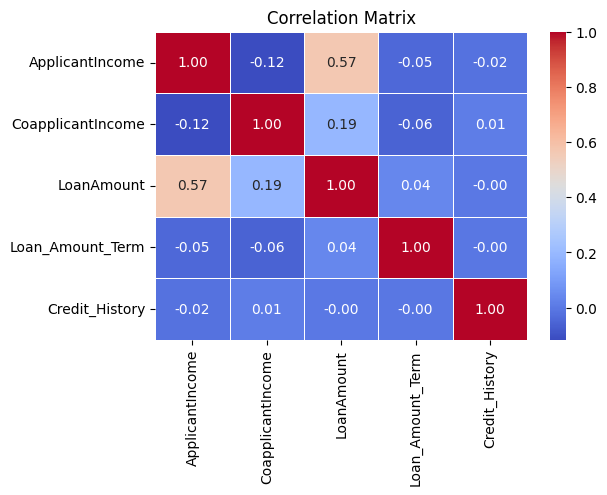

In [20]:
numerical = data.select_dtypes(include=['int64', 'float64'])

Correlation = numerical.corr()

plt.figure(figsize=(6,4))

sns.heatmap(Correlation,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

----
# 6. **One-Hot Encoding Categorical Columns**

In [21]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the new dataset
data.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


- Correlation Coefficient of loan_status_Y with other columns

In [22]:
# Find all columns except Loan_Status for correlation
encoded_cols = [col for col in data.columns if col != 'Loan_Status_Y']

# Calculate correlation of Loan_Status with encoded categorical columns
correlations = data[encoded_cols].corrwith(data['Loan_Status_Y'])

# Display correlations
print(correlations)


ApplicantIncome           -0.004710
CoapplicantIncome         -0.059187
LoanAmount                -0.033214
Loan_Amount_Term          -0.022549
Credit_History             0.540556
Gender_Male                0.017987
Married_Yes                0.091478
Dependents_1              -0.038740
Dependents_2               0.062384
Dependents_3+             -0.026123
Education_Not Graduate    -0.085884
Self_Employed_Yes         -0.003700
Property_Area_Semiurban    0.136540
Property_Area_Urban       -0.043621
dtype: float64


- Correlation Heatmap with Encoded Columns

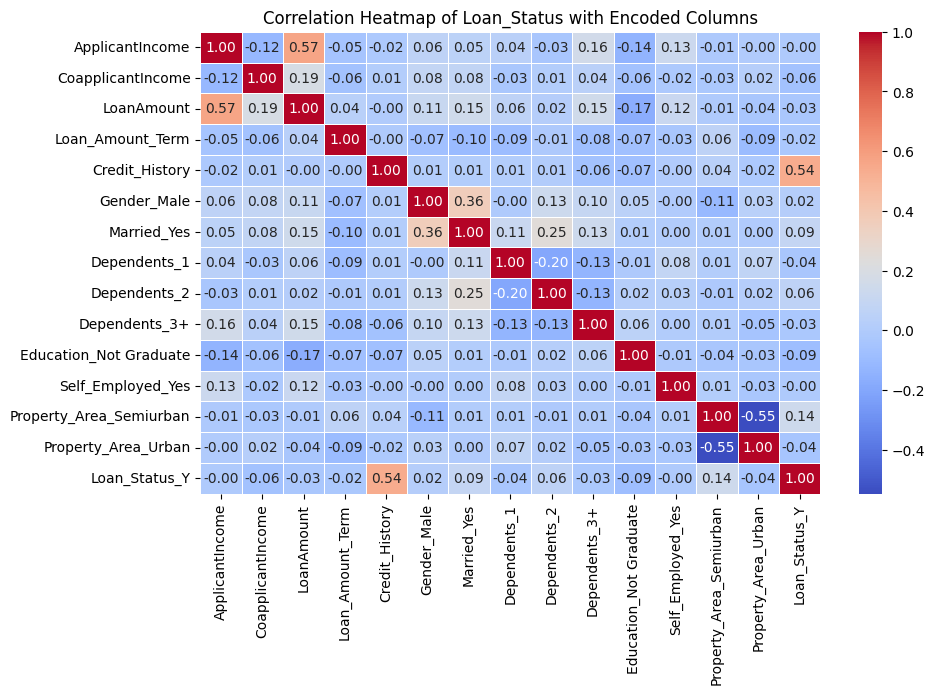

In [23]:
correlation_matrix = data[encoded_cols + ['Loan_Status_Y']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Loan_Status with Encoded Columns")
plt.show()

- Taking only the relevant columns that has positive 
correlation with the target variable i.e, loan_status_Y

In [24]:
# Filter correlations with 'Loan_Status_Y' column
Relevant_cols = correlations[correlations > 0.01].index.tolist()

print("Columns with correlation above 0.01 with Loan_Status_Y:", Relevant_cols)


Columns with correlation above 0.01 with Loan_Status_Y: ['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_2', 'Property_Area_Semiurban']




---

# 7. **Splitting the Data into Train and Test datasets**

In [25]:
train , test = train_test_split(data,test_size=0.2,random_state=0)



---

# 8. **Splitting the Data into Independent and Target Variables**

In [26]:
# seperate the target and independent variable
train_x = train[Relevant_cols]
train_y = train['Loan_Status_Y']

test_x = test[Relevant_cols]
test_y = test['Loan_Status_Y']

In [27]:
true_false_counts = train_y.value_counts()

print("Counts of True and False:")
print(true_false_counts)


Counts of True and False:
Loan_Status_Y
True     332
False    159
Name: count, dtype: int64


---
## 9. **Building a Model**

In [29]:
# create the object of the model
model = LogisticRegression()

model.fit(train_x,train_y)

predict = model.predict(test_x)

#print('Predicted Values on Test Data: \n',predict)

print('\nAccuracy Score on test data : ')
print(accuracy_score(test_y,predict))


Accuracy Score on test data : 
0.8292682926829268


---
## 10. **Evaluating Performance Metrics**

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Precision, Recall, F1-Score
precision = precision_score(test_y, predict)
recall = recall_score(test_y, predict)
f1 = f1_score(test_y, predict)

# ROC-AUC
roc_auc = roc_auc_score(test_y, predict)

# Confusion Matrix
cm = confusion_matrix(test_y, predict)

# Print the metrics
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("ROC-AUC: ", roc_auc)

print("\nConfusion Matrix:\n", cm)


Precision:  0.822429906542056
Recall:  0.9777777777777777
F1-Score:  0.8934010152284264
ROC-AUC:  0.7010101010101011

Confusion Matrix:
 [[14 19]
 [ 2 88]]
